In [1]:
from rdkit import Chem
from rdsl import (get_all_functional_group_patterns, get_functional_group_matches, select_atom_ids, select_molecule, highlight_atoms)

mol = Chem.MolFromSmiles("N1C=C(F)C=C1C1=CC2NCCC(C(=O)[O-])C=2C=C1")

[18:55:41] Conflicting single bond directions around double bond at index 10.
[18:55:41]   BondStereo set to STEREONONE and single bond directions set to NONE.


### Selection language
#### Pharmacophores
Uses the RDKit base features `Path(RDConfig.RDDataDir) / "BaseFeatures.fdef")` to select common pharmacophores

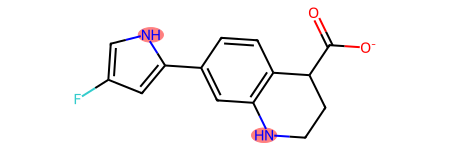

In [2]:
atom_ids = select_atom_ids(mol, "donors")
mol

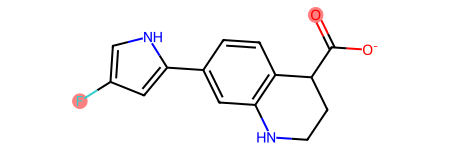

In [3]:
atom_ids = select_atom_ids(mol, "acceptors")
mol

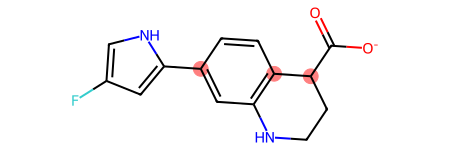

In [4]:
atom_ids = select_atom_ids(mol, "hydrophobes")
mol

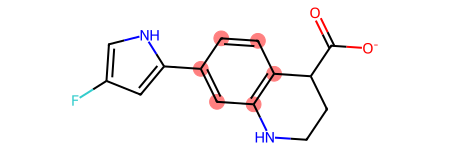

In [5]:
atom_ids = select_atom_ids(mol, "lumped_hydrophobes")
mol

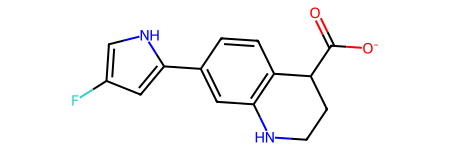

In [6]:
atom_ids = select_atom_ids(mol, "pos_ionizable")
mol

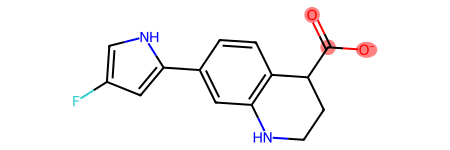

In [7]:
atom_ids = select_atom_ids(mol, "neg_ionizable")
mol

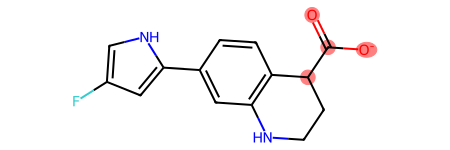

In [8]:
atom_ids = select_atom_ids(mol, "zn_binders")
mol

#### Substructure Alerts
Uses PAINS, BMS and Glaxo libraries to highlight known problematic substructures. Taken from https://github.com/PatWalters/rd_filters/tree/master.

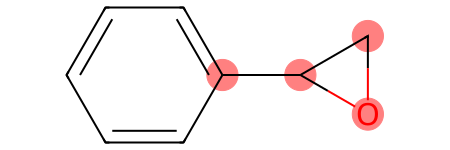

In [9]:
_mol = Chem.MolFromSmiles("c1ccccc1C1CO1")
atom_ids = select_atom_ids(_mol, "alerts")
_mol

#### Entity expansion


`byring S1` Expands S1 to the largest ring it's part of

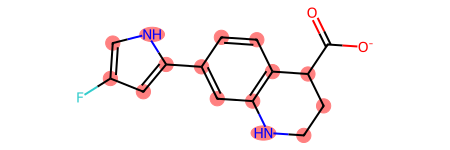

In [10]:
atom_ids = select_atom_ids(mol, "byring (elem N)")
mol

`byfunctional S1` Expands S1 to the largest functional group it's part of. Uses the 40k SMARTS from [SMARTS Chemist](https://chemist.smarts.plus/).

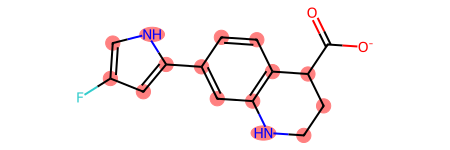

In [11]:
# The 4 donors expand to the full piperazine, carboxamide, secondary amine and carboxylic acid
atom_ids = select_atom_ids(mol, "byfunctional donors")
mol

`bymolecule S1` Expands S1 to complete molecules (connected with bonds)

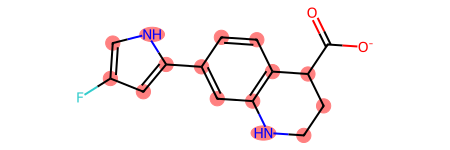

In [12]:
mol0 = Chem.MolFromSmiles("c1c(Nc2ncccn2)cccc1.[nH]1cccc1")
atom_ids = select_atom_ids(mol0, "bymolecule ringsize 5")
mol

`byres S1` Expands S1 to complete residues (using the residue name in PDB files)

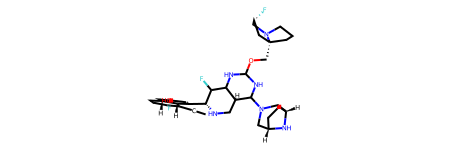

In [13]:
cocomplex = Chem.MolFromPDBFile("tests/data/7rpz.pdb")
result = select_molecule(cocomplex, "byres elem F")
result.mol

#### Atom properties


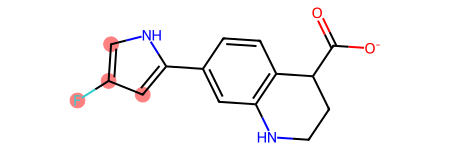

In [14]:
atom_ids = select_atom_ids(mol, "index 1-4")
mol

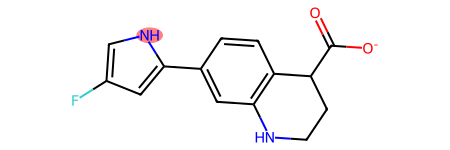

In [ ]:
atom_ids = select_atom_ids(mol, "nth 1 ringsize 5") # same as `first ringsize 5`
mol

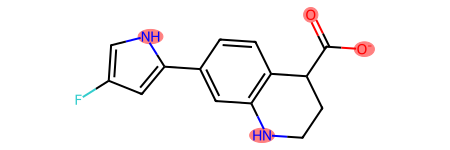

In [16]:
atom_ids = select_atom_ids(mol, "elem O+N")  # same `as elem O or elem N`
mol

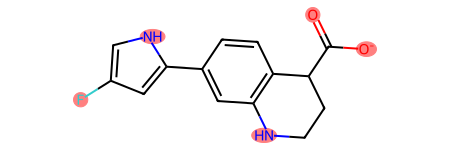

In [17]:
atom_ids = select_atom_ids(mol, "not atomic_number 6")
mol

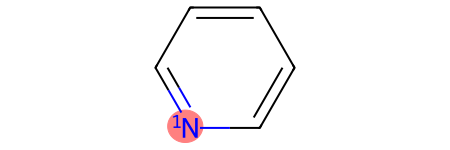

In [18]:
_mol = Chem.MolFromSmiles("c1cnccc1")
for atom in _mol.GetAtoms():
    if atom.GetSymbol() == "N":
        atom.SetIsotope(1)
atom_ids = select_atom_ids(_mol, "isotope 1")  # By default all atoms have an isotope of 0
_mol

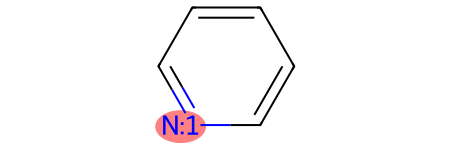

In [19]:
_mol = Chem.MolFromSmiles("c1cnccc1")
for atom in _mol.GetAtoms():
    if atom.GetSymbol() == "N":
        atom.SetAtomMapNum(1)
atom_ids = select_atom_ids(_mol, "not atom_map_number 0")  # By default all atoms have an atom map number of 0
_mol

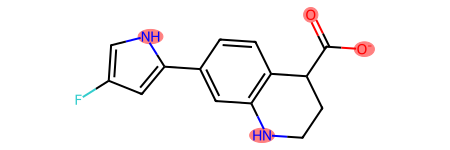

In [20]:
# Uses MMFF
atom_ids = select_atom_ids(mol, "partial_charge < -0.3")
mol

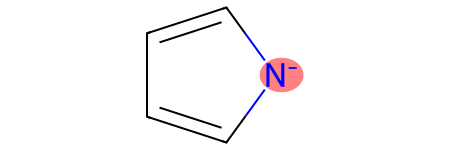

In [21]:
mol1 = Chem.MolFromSmiles("[n-]1cccc1")
atom_ids = select_atom_ids(mol1, "formal_charge <= -1")
mol1

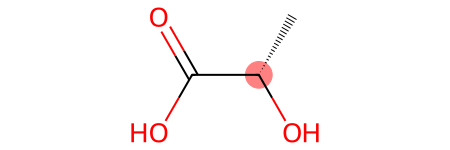

In [22]:
mol2 = Chem.MolFromSmiles("C[C@H](O)C(=O)O")
atom_ids = select_atom_ids(mol2, "stereo S")
mol2

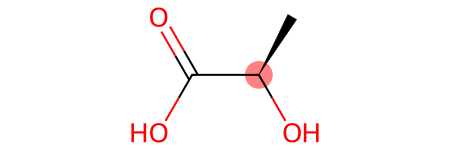

In [23]:
mol2 = Chem.MolFromSmiles("C[C@@H](O)C(=O)O")
atom_ids = select_atom_ids(mol2, "stereo R")
mol2

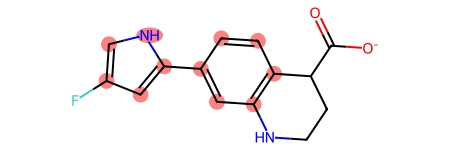

In [24]:
atom_ids = select_atom_ids(mol, "ring and aromatic")
mol

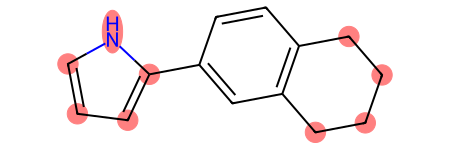

In [25]:
mol3 = Chem.MolFromSmiles("N1C=CC=C1C1=CC2CCCCC=2C=C1")
atom_ids = select_atom_ids(mol3, "aliphatic or (aromatic and ringsize 5)")
mol3

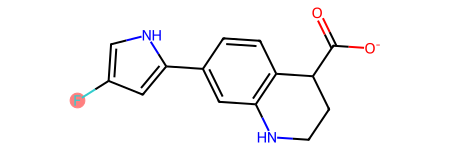

In [26]:
atom_ids = select_atom_ids(mol, "mass > 16")
mol

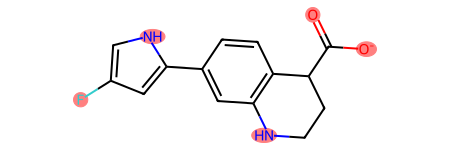

In [27]:
atom_ids = select_atom_ids(mol, "valence <4")
mol

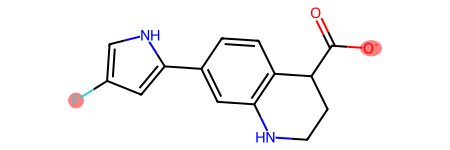

In [28]:
atom_ids = select_atom_ids(mol, "explicit_valence 1")
mol

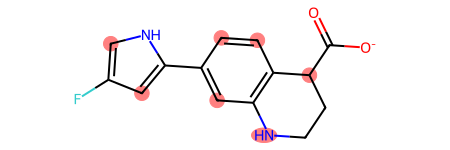

In [29]:
atom_ids = select_atom_ids(mol, "implicit_valence 1")
mol

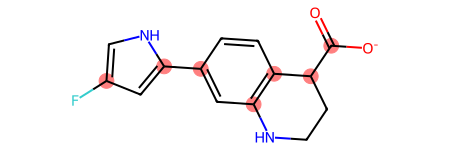

In [30]:
atom_ids = select_atom_ids(mol, "degree 3")
mol

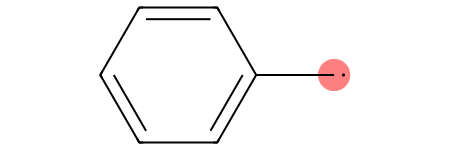

In [31]:
_mol = Chem.MolFromSmiles("[CH2]c1ccccc1")
atom_ids = select_atom_ids(_mol, "radical_electrons 1")
_mol

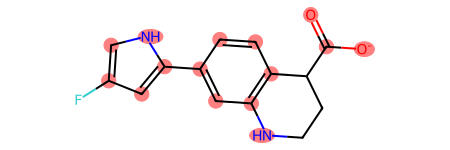

In [32]:
# One of OTHER, S, SP, SP2, SP2D, SP3, SP3D, SP3D2, UNSPECIFIED
atom_ids = select_atom_ids(mol, "hybridization SP2")
mol

#### PDB properties

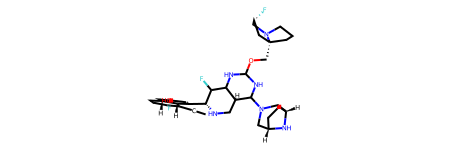

In [33]:
# Select by residue name
result = select_molecule(cocomplex, "resn 6IC")
result.mol

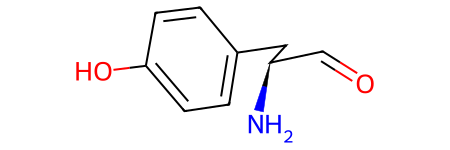

In [34]:
result = select_molecule(cocomplex, "resi 4")
result.mol

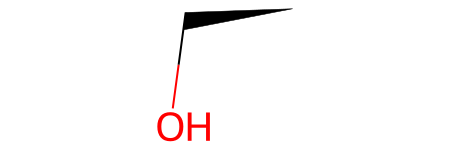

In [35]:
result = select_molecule(cocomplex, "alt A")
result.mol

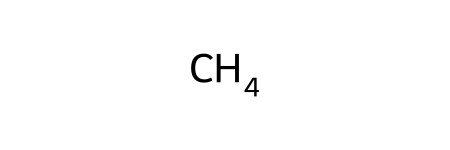

In [36]:
# Grab the C-alpha of tyrosine with residue number 4
result = select_molecule(cocomplex, "name CA and resi 4 and resn TYR")
result.mol

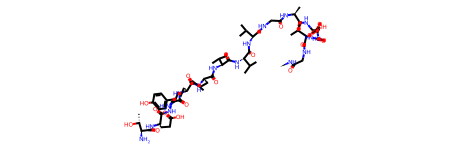

In [37]:
# Use the PDB atom id *not* the internal RDKit index
result = select_molecule(cocomplex, "id 1-100")
result.mol

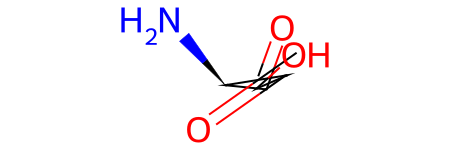

In [38]:
# Get residue G12 chain A
result = select_molecule(cocomplex, "chain A and resn ASP and resi 12")
result.mol

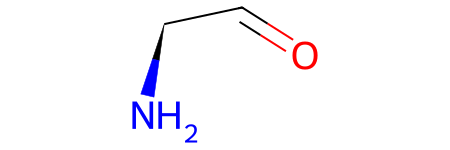

In [39]:
# Get backbone of residue ATYR4
result = select_molecule(cocomplex, "backbone and chain A and resn TYR and resi 4")
result.mol

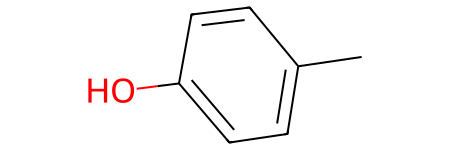

In [40]:
# Get sidechain of residue ATYR4
result = select_molecule(cocomplex, "sidechain and chain A and resn TYR and resi 4")
result.mol

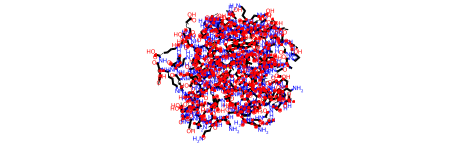

In [41]:
result = select_molecule(cocomplex, "protein")
result.mol

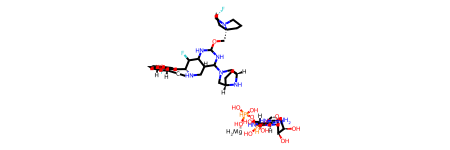

In [42]:
# residue 6IC (inhibitor) and ATP (with Mg bound covalently)
result = select_molecule(cocomplex, "hetatm and not solvent")
result.mol

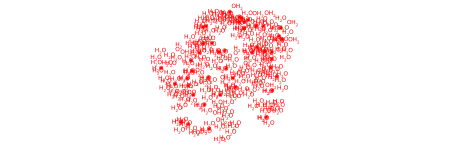

In [43]:
result = select_molecule(cocomplex, "solvent")
result.mol

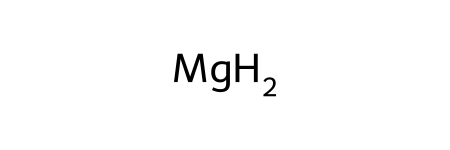

In [44]:
# Select the Mg in the ATP pocket
result = select_molecule(cocomplex, "metals")
result.mol

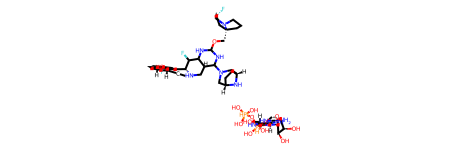

In [45]:
result = select_molecule(cocomplex, "organic")
result.mol

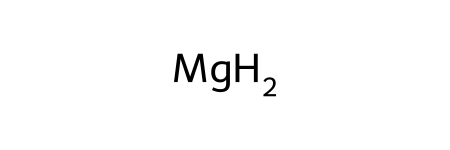

In [46]:
result = select_molecule(cocomplex, "inorganic")
result.mol

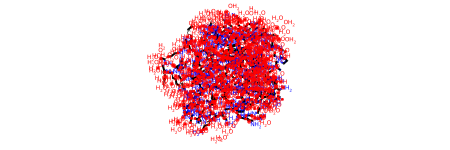

In [47]:
# Remove crystallisation non-biological artefacts. Defined in 
# Table A4 of PLINDER https://www.biorxiv.org/content/10.1101/2024.07.17.603955v1.full.pdf
result = select_molecule(cocomplex, "not artefact")
result.mol

[18:55:44] Explicit valence for atom # 31 O, 3, is greater than permitted
2026-03-01 18:55:44.815 | DEBUG    | rdsl.select.core:select_molecule:181 - Sanitization produced warnings for subset molecule


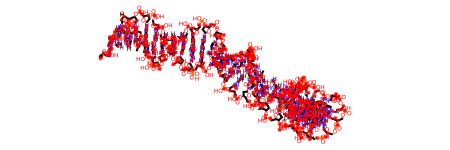

In [48]:
dna = Chem.MolFromPDBFile("tests/data/1CGP.pdb", sanitize=False)
result = select_molecule(dna, "nucleic")
result.mol

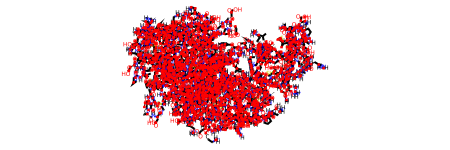

In [49]:
result = select_molecule(dna, "protein")
result.mol

[18:55:46] Explicit valence for atom # 170 O, 3, is greater than permitted
2026-03-01 18:55:46.323 | DEBUG    | rdsl.select.core:select_molecule:181 - Sanitization produced warnings for subset molecule


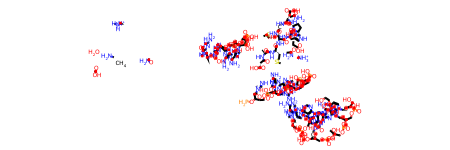

In [50]:
# Atoms with b-factors over 99
result = select_molecule(dna, "b > 99")
result.mol

[18:55:46] Explicit valence for atom # 170 O, 3, is greater than permitted
2026-03-01 18:55:46.881 | DEBUG    | rdsl.select.core:select_molecule:181 - Sanitization produced warnings for subset molecule


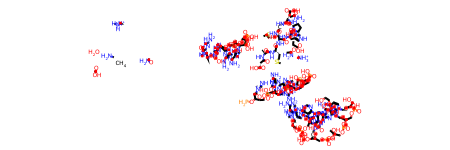

In [51]:
# Atoms with b-factors over 99
result = select_molecule(dna, "b > 99")
result.mol

[18:55:47] Explicit valence for atom # 31 O, 3, is greater than permitted
2026-03-01 18:55:47.154 | DEBUG    | rdsl.select.core:select_molecule:181 - Sanitization produced warnings for subset molecule


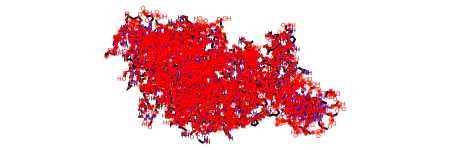

In [52]:
# Atoms with occupancy equal to 1
result = select_molecule(dna, "q 1")
result.mol

#### Bond expansion

`S1 extend 2` Expands S1 by 2 bonds connected to atoms in S1.

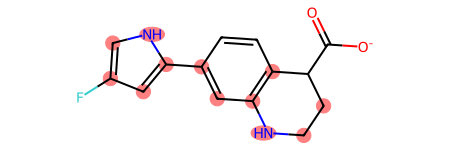

In [53]:
atom_ids = select_atom_ids(mol, "elem N extend 2")
mol

`bound_to S1` Atoms directly bonded to S1 including S1. Same as `S1 extend 1`.

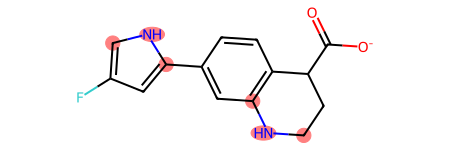

In [54]:
atom_ids = select_atom_ids(mol, "bound_to elem N")
mol

`neighbor S1` Atoms directly bonded to S1 excluding S1.

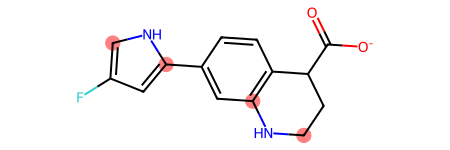

In [55]:
atom_ids = select_atom_ids(mol, "neighbor elem N")
mol

#### Proximity

`S1 within 5 of S2` Atoms in S1 that are within 5 Angstroms of any atom in
S2

[18:55:48] non-ring atom 17 marked aromatic
2026-03-01 18:55:48.419 | DEBUG    | rdsl.select.core:select_molecule:181 - Sanitization produced warnings for subset molecule


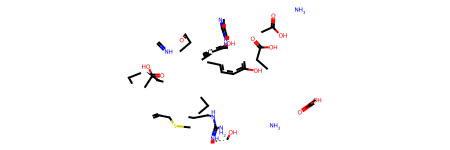

In [56]:
select_molecule(cocomplex, "sidechain within 5 of resn 6IC").mol

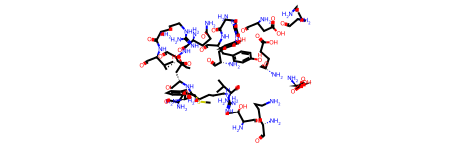

In [57]:
# Get full residues within 5Ang of the ligand
select_molecule(cocomplex, "byres sidechain within 5 of resn 6IC").mol

`S1 around 5` Atoms with centers within 5 Angstroms of the center of
any atom in S1

[18:55:48] non-ring atom 46 marked aromatic
2026-03-01 18:55:48.606 | DEBUG    | rdsl.select.core:select_molecule:181 - Sanitization produced warnings for subset molecule


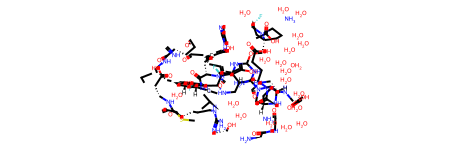

In [58]:
# Includes the ligand, any waters and any atoms with 5Ang of the ligand
select_molecule(cocomplex, "resn 6IC around 5").mol

`S1 beyond 12.3 of S2` Atoms in S1 that are at least 12.3 Anstroms away from S2

[18:55:48] non-ring atom 13 marked aromatic
2026-03-01 18:55:48.714 | DEBUG    | rdsl.select.core:select_molecule:181 - Sanitization produced warnings for subset molecule


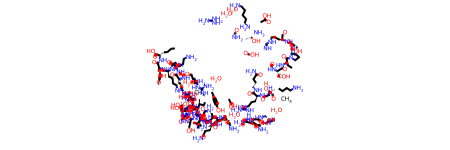

In [59]:
# Just the outside of the protein, far from the ligand
select_molecule(cocomplex, "protein beyond 30 of resn 6IC").mol

#### SMARTS

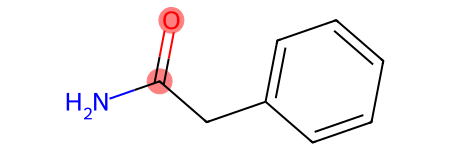

In [60]:
_mol = Chem.MolFromSmiles("NC(=O)Cc1ccccc1")
select_atom_ids(_mol, 'smarts " [C,N;R0]=O"')
_mol

#### Functional groups

`get_functional_group_matches` Get a description of all hierarchical functional groups in a molecule

        name                        atom_ids                 smarts   group  \
0    azecine  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)      C1=CC=CC=NC=CC=C1  cyclic   
1  quinoline  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)  C1=CC=C2C(=C1)C=CC=N2  cyclic   

  pattern_type  
0       smiles  
1       smiles  


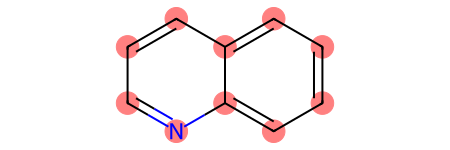

In [61]:
# This uses the sensationally useful list of 40000 SMARTS from https://chemist.smarts.plus/
_mol = Chem.MolFromSmiles("N1=CC=CC2=CC=CC=C12")
df = get_functional_group_matches(_mol, include_overshadowed=False)
print(df.head(10))
row = df.iloc[0]
# Highlight by atom IDs
highlight_atoms(_mol, atom_ids=row.atom_ids)

`Functional` select any other the above functional groups

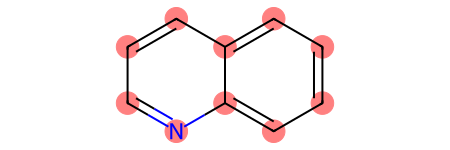

In [62]:
select_atom_ids(_mol, "functional azecine")
_mol

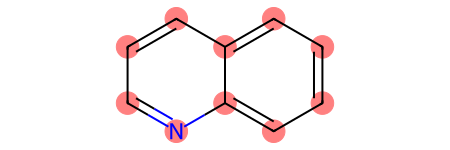

In [63]:
select_atom_ids(_mol, "functional pyridine+benzene")
_mol

In [64]:
df = get_functional_group_matches(mol, include_overshadowed=False)
df.head(5)

name                              atom_ids  \
0              carboxylic acid                          (13, 14, 15)   
1                     fluorine                                  (3,)   
2  1,2,3,4-tetrahydroquinoline  (6, 7, 8, 9, 10, 11, 12, 16, 17, 18)   
3                      pyrrole                       (0, 1, 2, 4, 5)   

              smarts             group pattern_type  
0   [CX3](=O)[O-,OH]  functional_group       smarts  
1              [FX1]  functional_group       smarts  
2  C1CC2=CC=CC=C2NC1            cyclic       smiles  
3          C1=CNC=C1            cyclic       smiles

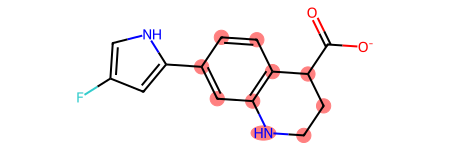

In [65]:
# Anything starting with a number will require quotes around the functional group name
select_atom_ids(mol, "functional '1,2,3,4-tetrahydroquinoline'")
mol

In [66]:
# All functional group patterns can be found here

# WARNING: These SMARTS patterns are taken from
# https://github.com/torbengutermuth/SmartChemist/blob/main/smarts/License_for_patterns_here
# These patterns have a Creative Commons Attribution-NoDerivatives 4.0 International Public License
# If you use these patterns in your own code, remember to credit them!
# Do NOT modify the patterns without permission!

patterns_df = get_all_functional_group_patterns()
patterns_df

name                                            smarts  \
0           1,2-dialdehyde              O=[#6H1X3$(*[#6])][#6H1X3$(*[#6])]=O   
1       1,2-diketoaldehyde        O=[#6X3H0$(*([#6])[#6])][#6H1X3$(*[#6])]=O   
2             1,2-diketone  O=[#6X3H0$(*([#6])[#6])][#6X3H0$(*([#6])[#6])]=O   
3           1,3-dialdehyde             O=[#6H1X3$(*[#6])]*[#6H1X3$(*[#6])]=O   
4       1,3-diketoaldehyde                 O=[#6X3H0$(*([#6])[#6])]*[#6H1]=O   
...                    ...                                               ...   
40959               valine                      C[C!R](C)C([C$(*-[N,O])]=O)N   
40960             m-cresol                                  [CH3]c1cc(O)ccc1   
40961             o-cresol                                  [CH3]c1c(O)cccc1   
40962             p-cresol                                  [CH3]c1ccc(O)cc1   
40963  α-ketoglutaric acid                               O=C(O)C(=O)CCC(=O)O   

                  group pattern_type  \
0      functional_group       smarts   
1      functional_group       smarts   
2      functional_group       smarts   
3      functional_group       smarts   
4      functional_group       smarts   
...                 ...          ...   
40959        biological       smarts   
40960        biological       smarts   
40961        biological       smarts   
40962        biological       smarts   
40963        biological       smarts   

                                             pattern  priority  \
0      <rdkit.Chem.rdchem.Mol object at 0x117d7fa70>         0   
1      <rdkit.Chem.rdchem.Mol object at 0x1201d9a80>         1   
2      <rdkit.Chem.rdchem.Mol object at 0x1201d9620>         2   
3      <rdkit.Chem.rdchem.Mol object at 0x1201d95b0>         3   
4      <rdkit.Chem.rdchem.Mol object at 0x1201d9540>         4   
...                                              ...       ...   
40959  <rdkit.Chem.rdchem.Mol object at 0x16aedb990>     40959   
40960  <rdkit.Chem.rdchem.Mol object at 0x16aedba00>     40960   
40961  <rdkit.Chem.rdchem.Mol object at 0x16aedba70>     40961   
40962  <rdkit.Chem.rdchem.Mol object at 0x16aedbae0>     40962   
40963  <rdkit.Chem.rdchem.Mol object at 0x16aedbb50>     40963   

                              hierarchy  
0      {carbonyl, aldehyde, acyl group}  
1        {carbonyl, acyl group, ketone}  
2        {carbonyl, acyl group, ketone}  
3      {carbonyl, aldehyde, acyl group}  
4        {carbonyl, acyl group, ketone}  
...                                 ...  
40959      {alanine, carbonyl, glycine}  
40960                 {methyl, toluene}  
40961                 {methyl, toluene}  
40962                 {methyl, toluene}  
40963    {carbonyl, acyl group, ketone}  

[40964 rows x 7 columns]

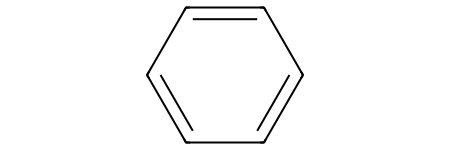

In [67]:
from rdkit import Chem

from rdsl.select import select_molecule

toluene = Chem.MolFromSmiles("Cc1ccccc1")
# All broken bonds have implicit hydrogens added to satisfy valence
select_molecule(toluene, "ring", broken_bonds="hydrogens").mol

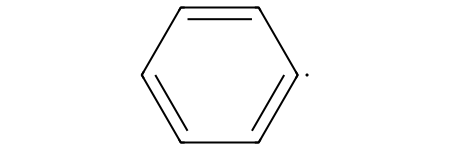

In [68]:
# All broken bonds are left as radicals
select_molecule(toluene, "ring", broken_bonds="radicals").mol

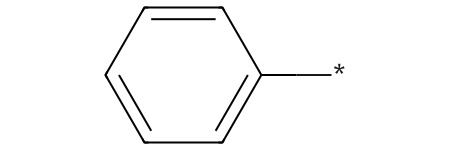

In [69]:
# Extract a fragment and keep it "wildcards" ([c]1ccccc1)
select_molecule(toluene, "ring", broken_bonds="wildcards").mol

In [70]:
# You can optionally return a mapping between the new atom IDs to the original atom IDs of the query molecule
result = select_molecule(toluene, "ring")

type(result)

rdsl.select.core.SelectionResult

In [71]:
# Mapping from new to old atom IDs
result.atom_mapping

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}

In [72]:
# Mapping from new to old bond IDs
result.bond_mapping

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}

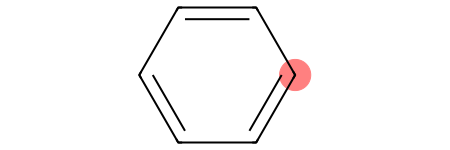

In [73]:
# New atom ID
highlight_atoms(result.mol, atom_ids=[0])

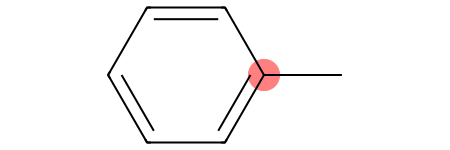

In [74]:
# Maps to old atom ID
highlight_atoms(toluene, atom_ids=[1])

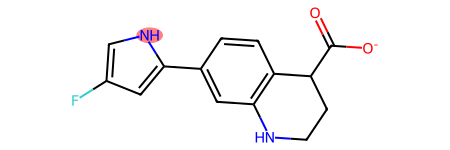

In [75]:
atom_ids = select_atom_ids(mol, "donors and ringsize 5")
mol